## Main imports

In [66]:
import matplotlib.pyplot as plt
import random
import copy
import time

from onemax_ea import OneMaxGeneticAlgorithm

## Create Evolutionary Algorithm class for OneMax problem

In [67]:
# Example Usage
BIT_LENGTH = 6
POP_SIZE = 5
GENERATIONS = 500

print(f"Running OneMax GA for bit length {BIT_LENGTH}...")

# Run GA
ea = OneMaxGeneticAlgorithm(
    bit_length=BIT_LENGTH,
    population_size=POP_SIZE, 
    generations=GENERATIONS,
    mutation_rate=0.01,
    crossover_rate=0.8
)

Running OneMax GA for bit length 6...


# Step by step EA

## Initialization and evaluation
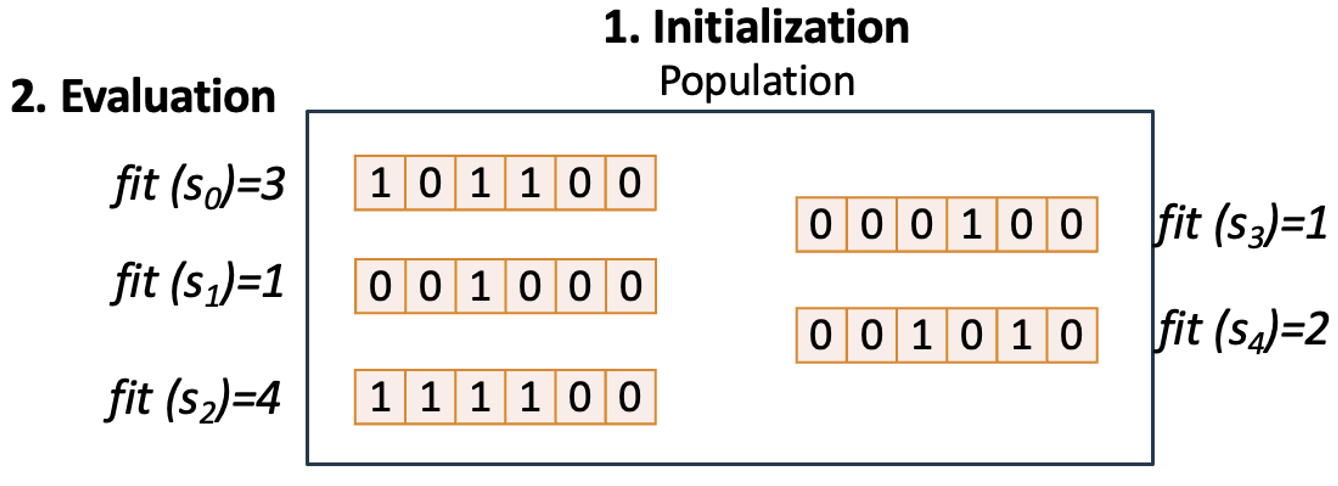

In [68]:
ea.initialize_population()
print(ea.population)

[[0, 0, 1, 0, 1, 1], [1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 0], [1, 0, 0, 1, 0, 0], [1, 1, 1, 0, 0, 1]]


In [69]:
scored_population = [(ind, ea.calculate_fitness(ind)) for ind in ea.population]
# Sort to find best
scored_population.sort(key=lambda x: x[1], reverse=True)
print(scored_population)

[([1, 0, 0, 1, 1, 1], 4), ([1, 1, 1, 0, 0, 1], 4), ([0, 0, 1, 0, 1, 1], 3), ([0, 1, 1, 0, 1, 0], 3), ([1, 0, 0, 1, 0, 0], 2)]


In [70]:
best_solution = scored_population[0]
best_fitness = best_solution[1]
print(f"Best solution: {best_solution} - Best fitness: {best_fitness}")
mean_fitness, std_dev_fitness = ea.current_fitness_stats()
print(f"Population: Mean fitness: {mean_fitness} - sdev: {std_dev_fitness}")

Best solution: ([1, 0, 0, 1, 1, 1], 4) - Best fitness: 4
Population: Mean fitness: 3.2 - sdev: 0.7483314773547882


## Tournament Selection
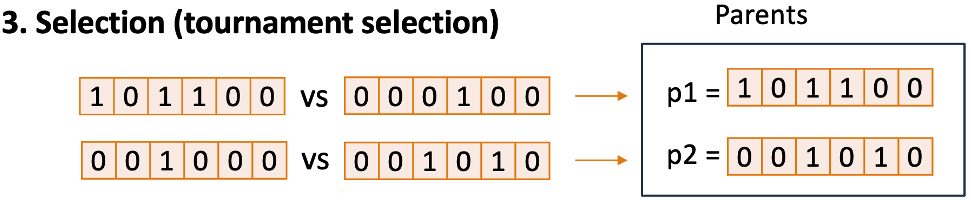

In [71]:
parent1 = ea.selection_tournament(k=3, logging=True)
parent2 = ea.selection_tournament(k=3, logging=True)

Contestants: [[0, 0, 1, 0, 1, 1], [1, 1, 1, 0, 0, 1], [1, 0, 0, 1, 1, 1]]
Winner: [1, 1, 1, 0, 0, 1]
Contestants: [[0, 1, 1, 0, 1, 0], [1, 0, 0, 1, 1, 1], [0, 0, 1, 0, 1, 1]]
Winner: [1, 0, 0, 1, 1, 1]


## One Point Crossover
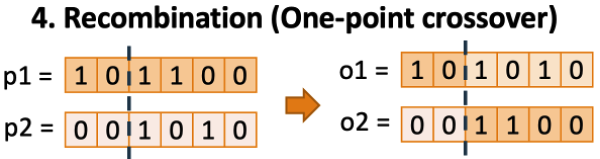

In [72]:
child1, child2 = ea.crossover_one_point(parent1, parent2)
print(f"Parents: \t {parent1, parent2}")
print(f"Childs: \t {child1, child2}")

Parents: 	 ([1, 1, 1, 0, 0, 1], [1, 0, 0, 1, 1, 1])
Childs: 	 ([1, 1, 1, 0, 1, 1], [1, 0, 0, 1, 0, 1])


## Bitflip Mutation
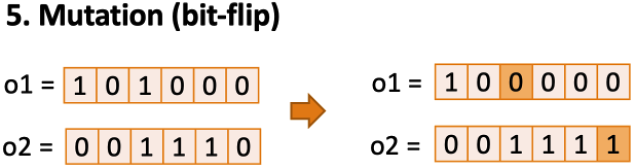

In [73]:
print(f"Original child1:\t{child1}")
ea.mutate(child1)
print(f"Mutated child1:\t\t{child1}")

print("=========================")

print(f"Original child2:\t{child2}")
ea.mutate(child2)
print(f"Mutated child2:\t\t{child2}")


Original child1:	[1, 1, 1, 0, 1, 1]
Mutated child1:		[1, 1, 0, 0, 1, 1]
Original child2:	[1, 0, 0, 1, 0, 1]
Mutated child2:		[1, 0, 0, 1, 0, 0]


## Replacement Strategy
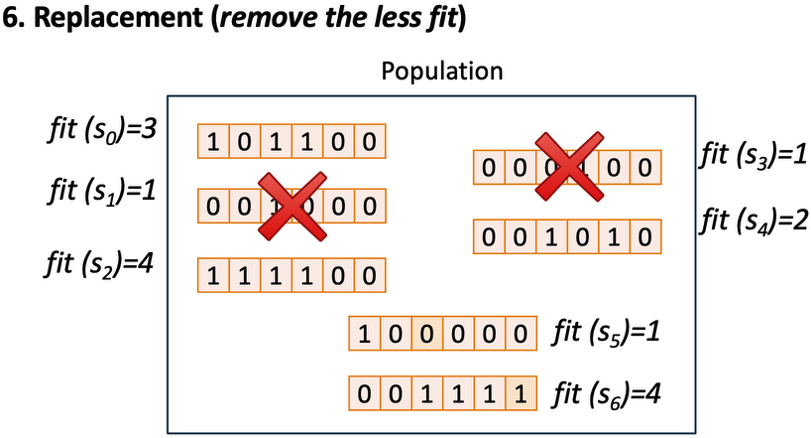

In [74]:
next_generation = [child1, child2] 
scored_next_generation = [(ind, ea.calculate_fitness(ind)) for ind in next_generation]
# Sort to find best
scored_next_generation.sort(key=lambda x: x[1], reverse=True)
scored_next_generation

[([1, 1, 0, 0, 1, 1], 4), ([1, 0, 0, 1, 0, 0], 2)]

In [75]:
population_best = [x for (x, _) in scored_population]
next_generation = population_best[:-2] + next_generation 
print(scored_population)
print(next_generation)

[([1, 0, 0, 1, 1, 1], 4), ([1, 1, 1, 0, 0, 1], 4), ([0, 0, 1, 0, 1, 1], 3), ([0, 1, 1, 0, 1, 0], 3), ([1, 0, 0, 1, 0, 0], 2)]
[[1, 0, 0, 1, 1, 1], [1, 1, 1, 0, 0, 1], [0, 0, 1, 0, 1, 1], [1, 1, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0]]


In [76]:
ea.population = next_generation
scored_population = [(ind, ea.calculate_fitness(ind)) for ind in ea.population]
# Sort to find best
scored_population.sort(key=lambda x: x[1], reverse=True)
print(scored_population)
best_solution = scored_population[0]
best_fitness = best_solution[1]
print(f"Best solution: {best_solution} - Best fitness: {best_fitness}")
mean_fitness, std_dev_fitness = ea.current_fitness_stats()
print(f"Population: Mean fitness: {mean_fitness} - sdev: {std_dev_fitness}")

[([1, 0, 0, 1, 1, 1], 4), ([1, 1, 1, 0, 0, 1], 4), ([1, 1, 0, 0, 1, 1], 4), ([0, 0, 1, 0, 1, 1], 3), ([1, 0, 0, 1, 0, 0], 2)]
Best solution: ([1, 0, 0, 1, 1, 1], 4) - Best fitness: 4
Population: Mean fitness: 3.4 - sdev: 0.8


# Full EA for OneMax

Running OneMax GA for bit length 100...
Initial Best Fitness: 57/100
Generation 100: Best Fitness = 87/100
Generation 200: Best Fitness = 92/100
Generation 300: Best Fitness = 92/100
Generation 400: Best Fitness = 96/100
Generation 500: Best Fitness = 97/100

--- Results ---
Best Fitness: 97/100 (97.00%)
Best Solution (first 20 bits): [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]...
Time Taken: 0.3908 seconds


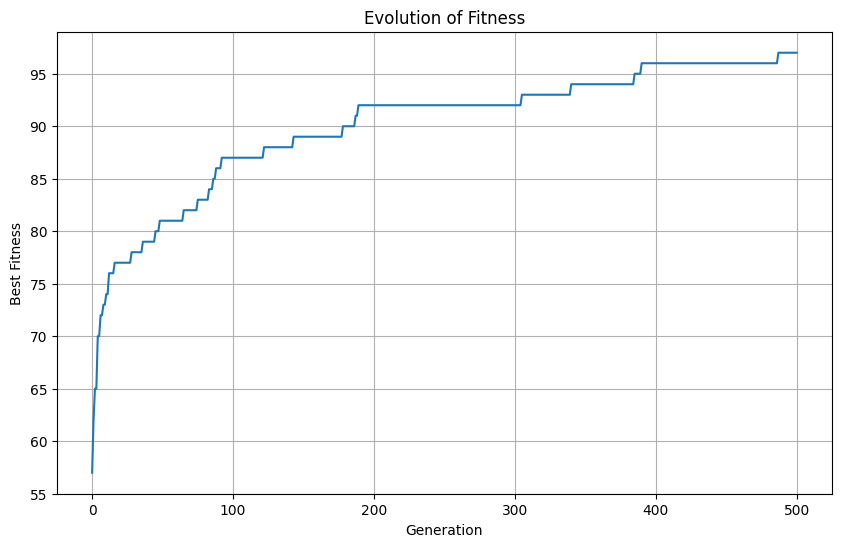

In [77]:
# Example Usage
BIT_LENGTH = 100
POP_SIZE = 50
GENERATIONS = 500

print(f"Running OneMax GA for bit length {BIT_LENGTH}...")

# Run GA
ea = OneMaxGeneticAlgorithm(
    bit_length=BIT_LENGTH,
    population_size=POP_SIZE, 
    generations=GENERATIONS,
    mutation_rate=0.01,
    crossover_rate=0.8
)

start_time = time.time()
best_sol, best_fit = ea.run()
end_time = time.time()

print("\n--- Results ---")
print(f"Best Fitness: {best_fit}/{BIT_LENGTH} ({(best_fit/BIT_LENGTH)*100:.2f}%)")
print(f"Best Solution (first 20 bits): {best_sol[:20]}...")
print(f"Time Taken: {end_time - start_time:.4f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(ea.fitness_history)
plt.title("Evolution of Fitness")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.grid(True)
plt.show()